In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%cd "C:\Users\Gamer\Desktop\CISC 451\Project\data"
%matplotlib inline

# Basic Preprocessing - Only needed to be done once

In [ ]:
# the 'plays' dataset is huge, containing 3632349 individual plays and is nearly 600MB in size, as such, only data after the end of the 2016-2017 NHL season will be used. 
# this will be written to a new csv for submission and ease of use moving forward
iter_csv = pd.read_csv('game_plays.csv',iterator=True,chunksize=1000)
plays = pd.concat([chunk[chunk['game_id']>2016030416] for chunk in iter_csv]) 

In [ ]:
games = pd.read_csv('game.csv')
skater_stats = pd.read_csv('game_skater_stats.csv')
team_stats = pd.read_csv('game_teams_stats.csv')
s_info = pd.read_csv('player_info.csv') # static library of players
t_info = pd.read_csv('team_info.csv') # static library of teams

In [ ]:
# Get dataframes for other datasets from after the end of the 2016-2017 season to align with the 'plays' dataset
skater_stats = skater_stats[skater_stats['game_id']>2016030416]
team_stats = team_stats[team_stats['game_id']>2016030416]
games = games[games['game_id']>2016030416]

In [ ]:
# Now that we have our dataframes, write them to new csvs for future reference
%cd "C:\Users\Gamer\Desktop\CISC 451\CISC451\project\data"


In [ ]:
plays.to_csv('plays_2017-2018_2018-2019.csv',index=False)
games.to_csv('games_2017-2018_2018-2019.csv',index=False)
team_stats.to_csv('teamstats_2017-2018_2018-2019.csv',index=False)
skater_stats.to_csv('skaterstats_2017-2018_2018-2019.csv',index=False)

## Simple EDA - starting with shots, then player-level and team-level EDA
Now that we have our datasets of interest for two NHL seasons, it is time to do some data exploration, let's start with individual events (where shots are of interest)

In [ ]:
# simple metadata
plays.head()

In [ ]:
# percentage of null values by column
plays.isna().sum()/len(plays)

In [22]:
plays.event.unique()

array([&#39;Game Scheduled&#39;, &#39;Period Ready&#39;, &#39;Period Start&#39;, &#39;Faceoff&#39;, &#39;Hit&#39;,
       &#39;Shot&#39;, &#39;Stoppage&#39;, &#39;Penalty&#39;, &#39;Blocked Shot&#39;, &#39;Takeaway&#39;,
       &#39;Giveaway&#39;, &#39;Missed Shot&#39;, &#39;Goal&#39;, &#39;Period End&#39;, &#39;Period Official&#39;,
       &#39;Game End&#39;, &#39;Official Challenge&#39;, &#39;Game Official&#39;,
       &#39;Shootout Complete&#39;, &#39;Early Intermission Start&#39;,
       &#39;Early Intermission End&#39;, &#39;Emergency Goaltender&#39;], dtype=object)

In [26]:
# so, there are many unique events that could be explored, let's look specifically at shots
shots = plays[(plays['event']=='Shot') | (plays['event']=='Missed Shot') | (plays['event']=='Blocked Shot')]
# while we're here, let's get all events that are goals too
goals = plays[plays['event']=='Goal']

In [27]:
# What are the different kinds of shots players take?
shots.secondaryType.unique()

array([&#39;Wrist Shot&#39;, &#39;Deflected&#39;, nan, &#39;Slap Shot&#39;, &#39;Backhand&#39;,
       &#39;Snap Shot&#39;, &#39;Wrap-around&#39;, &#39;Tip-In&#39;], dtype=object)

In [28]:
#TODO: Also preface the viz with volume of shot types so we can sample appropriately 
shots.isna().sum()/len(shots)

play_id                0.000000
game_id                0.000000
play_num               0.000000
team_id_for            0.000000
team_id_against        0.000000
event                  0.000000
secondaryType          0.480967
x                      0.000017
y                      0.000023
period                 0.000000
periodType             0.000000
periodTime             0.000000
periodTimeRemaining    0.000000
dateTime               0.000000
goals_away             0.000000
goals_home             0.000000
description            0.000000
st_x                   0.000017
st_y                   0.000023
rink_side              0.040218
dtype: float64

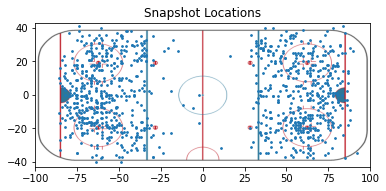

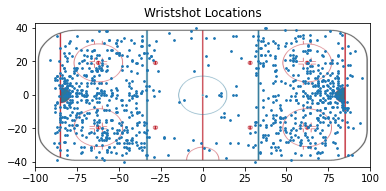

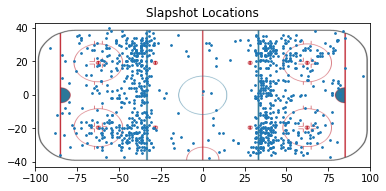

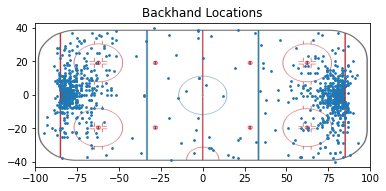

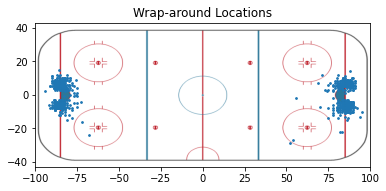

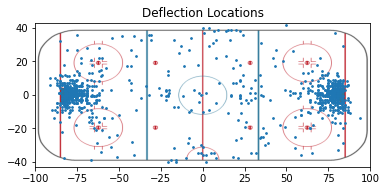

In [44]:
snapshots = shots[shots['secondaryType']=='Snap Shot']
snap_sample = snapshots.sample(n=1000, replace=False)
x_coords = snap_sample['x']
y_coords = snap_sample['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3)
plt.title('Snapshot Locations')
plt.show()

wrist = shots[shots['secondaryType']=='Wrist Shot']
wrist_sample = wrist.sample(n=1000, replace=False)
x_coords = wrist_sample['x']
y_coords = wrist_sample['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3)
plt.title('Wristshot Locations')
plt.show()

slap = shots[shots['secondaryType']=='Slap Shot']
slap_sample = slap.sample(n=1000, replace=False)
x_coords = slap_sample['x']
y_coords = slap_sample['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3)
plt.title('Slapshot Locations')
plt.show()

bh = shots[shots['secondaryType']=='Backhand']
bh_sample = bh.sample(n=1000, replace=False)
x_coords = bh_sample['x']
y_coords = bh_sample['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3)
plt.title('Backhand Locations')
plt.show()

wrap = shots[shots['secondaryType']=='Wrap-around']
wrap_sample = wrap.sample(n=1000, replace=False)
x_coords = wrap_sample['x']
y_coords = wrap_sample['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3)
plt.title('Wrap-around Locations')
plt.show()

deflections = shots[shots['secondaryType']=='Deflected']
def_sample = deflections.sample(n=1000, replace=False)
x_coords = def_sample['x']
y_coords = def_sample['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3)
plt.title('Deflection Locations')
plt.show()

That's a lot of events in just a few visuals, so let's breakdown what we can see here:
    - snapshots and wristshots can come from pretty much anywhere, and they are the most common
    - slapshots are typically taken from closer to the blueline, which we can see in the visual
    - backhands typically come from closer to the net, as they are weaker than others, as is        the same with wrap-arounds (behind the net to the front), and deflections from shots that      are taken from farther out (slapshots)

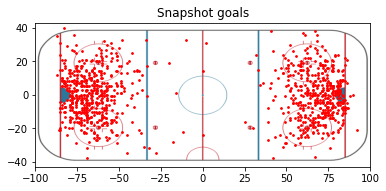

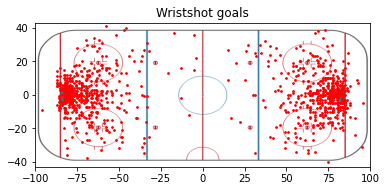

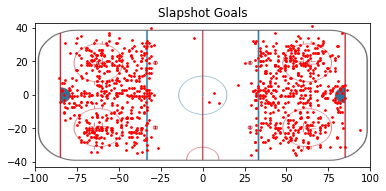

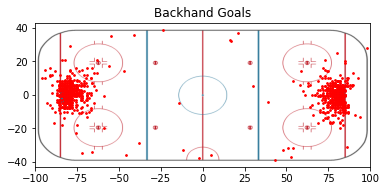

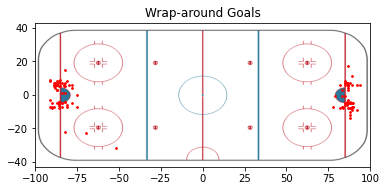

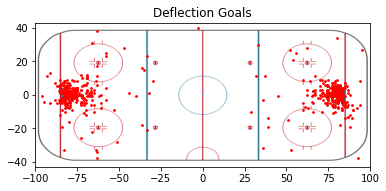

In [51]:
# Next, let's look at shots that turn into goals
# TODO: Super-impose goals on-top of shots
snap_goals = goals[goals['secondaryType']=='Snap Shot']
snap_goals_sample = snap_goals.sample(n=1000, replace=False)
x_coords = snap_goals_sample['x']
y_coords = snap_goals_sample['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3,color='red')
plt.title('Snapshot goals')
plt.show()

wrist_goals = goals[goals['secondaryType']=='Wrist Shot']
wrist_goals_sample = wrist_goals.sample(n=1000, replace=False)
x_coords = wrist_goals_sample['x']
y_coords = wrist_goals_sample['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3,color='red')
plt.title('Wristshot goals')
plt.show()

slap_goals = goals[goals['secondaryType']=='Slap Shot']
slap_goals_sample = slap_goals.sample(n=1000, replace=False)
x_coords = slap_goals_sample['x']
y_coords = slap_goals_sample['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3,color='red')
plt.title('Slapshot Goals')
plt.show()

bh_goals = goals[goals['secondaryType']=='Backhand']
bh_goals_sample = bh_goals.sample(n=1000, replace=False)
x_coords = bh_goals_sample['x']
y_coords = bh_goals_sample['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3,color='red')
plt.title('Backhand Goals')
plt.show()

wrap_goals = goals[goals['secondaryType']=='Wrap-around']
x_coords = wrap_goals['x']
y_coords = wrap_goals['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3,color='red')
plt.title('Wrap-around Goals')
plt.show()

def_goals = goals[goals['secondaryType']=='Deflected']
x_coords = def_goals['x']
y_coords = def_goals['y']
event=shots['event']
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3,color='red')
plt.title('Deflection Goals')
plt.show()

## Exploration of features, along with feature selection

## Simple models if time permits